# Relational Learning - Carcinogenesis

The following relational learning dataset was sourced from a GitHub page for datasets from Imperial College London designed for use with GILPS (**G**eneral **I**nductive **L**ogic **P**rogramming **S**ystem) [1], with an adapted version of the dataset kindly provided by Dr Alireza Tamaddonni Nezhad used. This dataset includes data for chemical carcinogenesis, which is the formation of cancer, where normal cells are transformed into cancerous cells [2]. The code used to prepare and create utilities to use Aleph with Python was adapted from code by Dany Varghese.

We would like to thank Dr Tamaddoni Nezhad for his help guiding us in this project and Dany Varghese for his invaluable help during the COMM055 Machine Learning and Data Mining lab sessions.

**Sources:**

[1] https://github.com/JoseCSantos/GILPS/tree/master/datasets/carcinogenesis 

[2] https://en.wikipedia.org/wiki/Carcinogenesis

[3] A. Srinivasan, R.D. King, S.H. Muggleton, M.J.E. Sternberg. Carcinogenesis predictions using ILP. *Lavrač N., Džeroski S. (eds) Inductive Logic Programming. ILP 1997. Lecture Notes in Computer Science (Lecture Notes in Artificial Intelligence), vol 1297. Springer, Berlin, Heidelberg.* [https://doi.org/10.1007/3540635149_56]

[4] A. Srinivasan. Aleph Documentation [https://www.cs.ox.ac.uk/activities/programinduction/Aleph/aleph.html]

[5] H.S Rosenkranz,  G. Klopman. Structural alerts to genotoxicity: the interaction of human and artificial intelligence. *Mutagenesis, Volume 5, Issue 4, July 1990, Pages 333–362,1990*. [https://academic.oup.com/mutage/article-abstract/5/4/333/1051851?redirectedFrom=PDF]

[6] A. Srinivasan, R.D. King, S.H. Muggleton. the role of background knowledge: using a problem from chemistry to examine the performance of an ILP algorithm. *Intelligent Data Analysis in Medicine and Pharmacology*. Kluwer Academic Press, 1996. [https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.23.8422&rep=rep1&type=pdf]

[7] A. Srinivasan, R.D. King, S.H. Muggleton, M.J.E. Sternberg. Structure-activity relationships derived by machine learning: the use of atoms and their bond connectivities to predict mutagenicity by inductive logic programming. Proc Natl Acad Sci USA, 1996. [https://pubmed.ncbi.nlm.nih.gov/8552655/]

[8] Claire Julia Kennedy. Strongly Typed Evolutionary Programming. University of Bristol. 1997. https://research-information.bris.ac.uk/en/studentTheses/strongly-typed-evolutionary-programming-2

### Learning Rules with the Whole Dataset as Training

To generate an initial idea of the potential rules that could be found from the carcinogenesis dataset, the Aleph learning algorithm is applied, using all of the available background knowledge and training with all available examples. Aleph (**A** **L**earning **E**ngine for **P**roposing **H**ypotheses) is an Inductive Logic Programming (ILP) system that was developed by Ashwin Srinivasan. This method of learning was inspired by the following publication by the research paper associated with the chosen dataset entitled 'Carcinogenesis Prediction Using ILP' [3]. The documentation for Aleph was also highly useful [4].

The settings that were used for Aleph were provided in a background *'aleph.b'* file and were justified with research from [3].

In [4]:
%%time
from pyswip import Prolog, Variable, Functor
import os
from utils import *

file_name='all_examples_train.pl'
learn(file_name[:-3])
theory=generate_theory_aleph(file_name)
print(theory)

['active(A) :-   ashby_alert(halide10,A,B)', 'active(A) :-   has_property(A,cytogen_ca,p), atm(A,B,h,3,C), atm(A,D,n,32,E)', 'active(A) :-   atm(A,B,n,32,C), lteq(C,-0.772)', 'active(A) :-   has_property(A,cytogen_sce,p), atm(A,B,c,16,C), gteq(C,-0.2)', 'eactive(d53)', 'active(A) :-   has_property(A,cytogen_ca,n), has_property(A,cytogen_sce,n), has_property(A,chromaberr,n)', 'active(A) :-   has_property(A,cytogen_ca,p), atm(A,B,o,40,C), lteq(C,-0.517)', 'active(A) :-   has_property(A,cytogen_sce,p), atm(A,B,o,50,C), non_ar_hetero_6_ring(A,D)', 'active(A) :-   has_property(A,cytogen_ca,n), has_property(A,chromex,p), atm(A,B,c,22,C)', 'active(A) :-   atm(A,B,o,50,C), gteq(C,-0.152)', 'active(A) :-   has_property(A,cytogen_sce,n), ashby_alert(di10,A,B), methyl(A,C)', 'active(A) :-   has_property(A,mouse_lymph,n), has_property(A,chromaberr,n), mutagenic(A)', 'active(A) :-   atm(A,B,o,45,C), gteq(C,-0.616), non_ar_6c_ring(A,D)', 'active(A) :-   atm(A,B,o,49,C), lteq(C,-0.652), gteq(C,-0.652

From this, we are able to find potential classification rules for carcinogenicity. For example, **'active(A) :-   ashby_alert(halide10,A,B)'** suggests that if there is an Ashby structural alert for Halide10, then chemical A is classified as carcinogenic. Ashby structural alerts were researched to be able to understand their meaning [5].

### Performing Cross-validation to learn rules with K-Fold Cross Validation

To be able to test the hypothesis that the Aleph ILP learning algorithm would be able to better classify carcinogenicity when provided with a greater amount of background knowledge was tested by creating five files, each with different *modeb* settings (B0-B4). The idea of using background information to be able to improve the performance on an ILP learning algorithm with differing levels of background information was inspired by [6].

> Background knowledge file 'B0.pl' contained only details on the atomic structure:

    :- modeb(*,atm(+drug,-atomid,#element,#integer,-charge)).

> The next background knowledge file 'B1.pl' added to B0 with bond information added:
    
    :- modeb(*,symbond(+drug,+atomid,-atomid,#integer)).

> 'B2.pl' expanded upon this with a number of additional modeb parameters:

    :- modeb(1,gteq(+charge,#real)).
    :- modeb(1,lteq(+charge,#real)).
    :- modeb(1,((+charge) = (#charge))).
    :- modeb(1,gteq(+nalerts,#integer)).
    :- modeb(1,lteq(+nalerts,#integer)).
    :- modeb(1,((+nalerts) = (#nalerts))).
    
> 'B3.pl' added ring information:
        

    :- modeb(*,nitro(+drug,-ring)).
    :- modeb(*,sulfo(+drug,-ring)).
    :- modeb(*,methyl(+drug,-ring)).
    :- modeb(*,methoxy(+drug,-ring)).
    :- modeb(*,amine(+drug,-ring)).
    :- modeb(*,aldehyde(+drug,-ring)).
    :- modeb(*,ketone(+drug,-ring)).
    :- modeb(*,ether(+drug,-ring)).
    :- modeb(*,sulfide(+drug,-ring)).
    :- modeb(*,alcohol(+drug,-ring)).
    :- modeb(*,phenol(+drug,-ring)).
    :- modeb(*,carboxylic_acid(+drug,-ring)).
    :- modeb(*,ester(+drug,-ring)).
    :- modeb(*,amide(+drug,-ring)).
    :- modeb(*,deoxy_amide(+drug,-ring)).
    :- modeb(*,imine(+drug,-ring)).
    :- modeb(*,alkyl_halide(+drug,-ring)).
    :- modeb(*,ar_halide(+drug,-ring)).
    :- modeb(*,benzene(+drug,-ring)).
    :- modeb(*,hetero_ar_6_ring(+drug,-ring)).
    :- modeb(*,non_ar_6c_ring(+drug,-ring)).
    :- modeb(*,non_ar_hetero_6_ring(+drug,-ring)).
    :- modeb(*,six_ring(+drug,-ring)).
    :- modeb(*,carbon_5_ar_ring(+drug,-ring)).
    :- modeb(*,hetero_ar_5_ring(+drug,-ring)).
    :- modeb(*,non_ar_5c_ring(+drug,-ring)).
    :- modeb(*,non_ar_hetero_5_ring(+drug,-ring)).
    :- modeb(*,five_ring(+drug,-ring)).
    :- modeb(1,connected(+ring,+ring)).
    
> 'B4.pl' added some information on previously determined rules for **mutagenicity**, that were found by experiments on obtaining structural rules for mutagenesis [7]:
    
    :- modeb(*,mutagenic(+drug)).
    
As the data had already been split into 10 test and train folds, 10-fold cross validation was used to be able to make effective evaluations on the performance of the Aleph ILP learning algorithm when provided with different levels of background information. This is a far more effective method than the Holdout method as multiple test and train splits are used.

[**Note:** this took over 36 hours to run so was not rerun despite a minor graphical error at the end of the output segment. The graph not plotted due to naming error is plotted below so no information is lost.]

------------------- RULE SETS FOR 10 FOLD CROSS VALIDATION -------------------
Rules generated by Aleph for Carcinogenesis Dataset using Different Amounts of Background Knowledge:
BO
['active(d107)', 'active(A) :-   atm(A,B,c,16,C), atm(A,D,n,32,E)', 'active(d279)', 'active(A) :-   ashby_alert(amino,A,B), atm(A,C,s,74,D)', 'active(A) :-   has_property(A,mouse_lymph,n), atm(A,B,o,49,C)', 'active(A) :-   has_property(A,drosophila_slrl,p)', 'active(A) :-   has_property(A,salmonella,p), atm(A,B,c,22,C), atm(A,D,c,14,E)', 'active(A) :-   has_property(A,cytogen_ca,p), has_property(A,cytogen_sce,p), ashby_alert(nitro,A,B)', 'active(A) :-   has_property(A,cytogen_sce,n), has_property(A,chromaberr,n)', 'active(A) :-   has_property(A,salmonella,n), has_property(A,cytogen_sce,p), ashby_alert(halide10,A,B)', 'active(A) :-   has_property(A,chromex,p), ashby_alert(amino,A,B)', 'active(A) :-   atm(A,B,p,62,C)', 'active(A) :-   has_property(A,mouse_lymph,n), has_property(A,cytogen_ca,n), has_property(

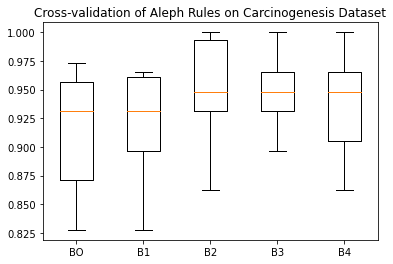

NameError: name 'names1' is not defined

In [3]:
%%time
# Adapted from COMM055 Machine Learning and Data Mining, Lab Sheet 4, 2021

import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import os
import collections
import pickle
from pyswip import Prolog, Variable, Functor
from utils import *

models = []
B0='B0.pl'
B1='B1.pl'
B2='B2.pl'
B3='B3.pl'
B4='B4.pl'

models.append(('ILP','BO', B0))
models.append(('ILP','B1', B1))
models.append(('ILP','B2', B2))
models.append(('ILP','B3', B3))
models.append(('ILP','B4', B4))

results = []
names = []
avg_time = []
print('------------------- RULE SETS FOR 10 FOLD CROSS VALIDATION -------------------')
for name, label, model in models:
    if name =='ILP':
        print('Rules generated by Aleph for Carcinogenesis Dataset using Different Amounts of Background Knowledge:')
        print(label)
        cv_results, time_learn= aleph_cross_val_score_1(model, cv=10, scoring='accuracy')
        print(cv_results)
        print('\n')
    else:
        kfold = StratifiedKFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    avg_time.append(time_learn)
    names.append(label)
    print('\n')
    print('\t Average Accuracy of %s is  %f with std of %f' % (label, cv_results.mean(), cv_results.std()))
    print('\n')
    
pyplot.boxplot(results, labels=names)
pyplot.title('Cross-validation of Aleph Rules on Carcinogenesis Dataset')
pyplot.show()

pyplot.plot(names,avg_time)
pyplot.xlabel('Background Knowledge')
pyplot.ylabel('Learning time (Sec)')
pyplot.show()

It is clear from the output above that 10 sets of hypothesis rules have been created using Aleph for each level of background information with the aim of classifying the carcinogenicty. As so many rules have been generated, the intricacies of each is not explored, however average learning times and model performance is evaluated.

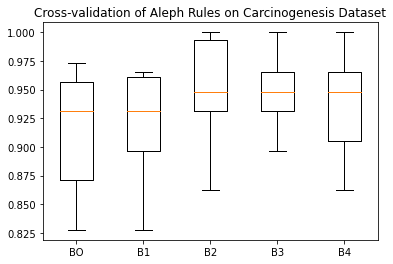

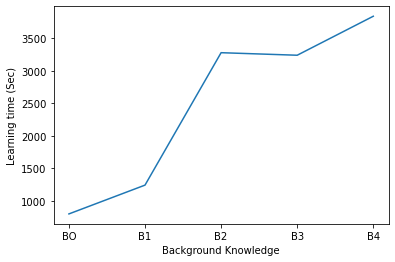

In [5]:
from matplotlib import pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Cross-validation of Aleph Rules on Carcinogenesis Dataset')
plt.show()

plt.plot(names,avg_time)
plt.xlabel('Background Knowledge')
plt.ylabel('Learning time (Sec)')
plt.show()

From the above results it is clear that increasing the amount of background knowledge included in the Aleph ILP system does improve the performance of the classifier. This would suggest the findings from Muggleton [6]. Despite the general trend of improvement, there is a minor decrease in performance when mutagenicity rules are added (betweeen B3 and B4). This suggests that the addition of previously found mutagenicity rules does not add significant perfomance to the learning algorithm, however leads to an increase in learning time.

### Using Numerical Features from Ashby Indicators with other Learning Algorithms

The only numerical data that was provided in the dataset was in the form of Ashby indicators and counts in the file '*ind_nos.pl*'. By adapting a *'write_to_csv.pl'* file from Lab Sheet 8, Machine Learning and Data Mining 2021, the numerical features found, along with target variables were written into a CSV file using SWI-Prolog. To be able to learn more about the Ashby indicators and the meaning of their numerical values, the thesis work of C.J. Kennedy[8] was explored. 

In [1]:
# Creating csv file for indicators via SWI-Prolog

# swipl
#?- [writetocsv].
#true.
#?- w('Ind to CSV.CSV').
#true.

The CSV file generated was then manually adapted so that missing values were changed to empty values and data split across multiple rows was joined into a single row. The file *'Ind to CSV cleaned missing.csv'* was hence created.

In [42]:
import pandas as pd

# LOADING CLEANED CSV FILE
data = pd.read_csv('Ind to CSV cleaned missing.csv', delimiter=',')

# RENAMING COLUMNS
print('Initial Feature Names:')
print(data.columns)
data.columns = ['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48',
                'ethoxy', 'di64', 'di66', 'di67a', 'halide10', 'methoxy',
                'di227','di232', 'ringsize4', 'di260', 'methanol', 'di281',
                'nitro', 'activity']
print('\nFeature Names After Renaming: \n{}'.format(data.columns))

data

Initial Feature Names:
Index(['id', ' amino', ' di8', ' di10', ' di23', ' cyanate', ' di48',
       ' ethoxy', ' di64', ' di66', ' di67a', ' halide10', ' methoxy',
       ' di227', ' di232', ' ringsize4', ' di260', ' methanol', ' di281',
       ' nitro', ' activity'],
      dtype='object')

Feature Names After Renaming: 
Index(['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy',
       'di64', 'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232',
       'ringsize4', 'di260', 'methanol', 'di281', 'nitro', 'activity'],
      dtype='object')


id  amino  di8  di10  di23  cyanate  di48  ethoxy  di64  di66  ...  \
0    d109    NaN  NaN   1.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
1    d166    NaN  NaN   1.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
2    d199    NaN  NaN   1.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
3    d211    NaN  NaN   1.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
4    d217    NaN  NaN   1.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
..    ...    ...  ...   ...   ...      ...   ...     ...   ...   ...  ...   
200   d78    NaN  NaN   2.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
201   d38    NaN  NaN   NaN   NaN      NaN   NaN     NaN   NaN   NaN  ...   
202   d41    NaN  NaN   1.0   NaN      NaN   NaN     NaN   NaN   NaN  ...   
203  d260    NaN  NaN   NaN   NaN      NaN   NaN     NaN   NaN   NaN  ...   
204  d281    NaN  NaN   NaN   NaN      NaN   NaN     NaN   NaN   NaN  ...   

     halide10  methoxy  di227  di232  ringsize4  di260  methanol  di281  \
0         NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
1         NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
2         NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
3         NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
4         NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
..        ...      ...    ...    ...        ...    ...       ...    ...   
200       NaN      NaN    NaN    NaN        NaN    NaN       3.0    NaN   
201       NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
202       NaN      NaN    NaN    NaN        NaN    NaN       NaN    NaN   
203       NaN      NaN    NaN    NaN        NaN    4.0       NaN    NaN   
204       NaN      NaN    NaN    NaN        NaN    NaN       NaN    4.0   

     nitro   activity  
0      NaN     active  
1      NaN   inactive  
2      NaN     active  
3      NaN   inactive  
4      NaN   inactive  
..     ...        ...  
200    1.0   inactive  
201    2.0     active  
202    2.0     active  
203    4.0   inactive  
204    4.0     active  

[205 rows x 21 columns]

### Dealing with Missing Values:
Three methods were tested to deal with the missing values in the dataset:

(a) **SimpleImputer()** - imputing missing values with the mean

(b) **IterativeImputer()** - iteratively imputing missing values

(c) **Null Values** - replacing missing values with a null (zero) value

#### (a) Using SimpleImputer()
Sci-Kit Learn's Simple imputer (https://scikit-learn.org/stable/modules/impute.html) is a basic way of replacing missing values. Here, it is used to replace the missing values for the column mean as this is a commonly used method. This is a *univariate* method as it only uses information for each column.

In [43]:
# As we cannot have missing values for the algorithm, we can impute values using SimpleImputer
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy='mean')

imp_data = my_imputer.fit_transform(data.iloc[:,1:-1])
imp_data = pd.DataFrame(imp_data)

In [44]:
# Joining the imputed data with the id and target features.

new_data = pd.concat([data.iloc[:,0].reset_index(drop=True),imp_data.reset_index(drop=True), data.iloc[:,-1].reset_index(drop=True)], axis=1)
new_data.columns = ['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48','ethoxy',
                    'di64','di66', 'di67a', 'halide10', 'methoxy','di227','di232',
                    'ringsize4', 'di260','methanol', 'di281','nitro', 'activity']
new_data

id     amino  di8      di10  di23  cyanate   di48  ethoxy  di64  di66  \
0    d109  1.440678  1.0  1.000000   1.0      3.0  1.125     1.9   1.2  2.25   
1    d166  1.440678  1.0  1.000000   1.0      3.0  1.125     1.9   1.2  2.25   
2    d199  1.440678  1.0  1.000000   1.0      3.0  1.125     1.9   1.2  2.25   
3    d211  1.440678  1.0  1.000000   1.0      3.0  1.125     1.9   1.2  2.25   
4    d217  1.440678  1.0  1.000000   1.0      3.0  1.125     1.9   1.2  2.25   
..    ...       ...  ...       ...   ...      ...    ...     ...   ...   ...   
200   d78  1.440678  1.0  2.000000   1.0      3.0  1.125     1.9   1.2  2.25   
201   d38  1.440678  1.0  1.490741   1.0      3.0  1.125     1.9   1.2  2.25   
202   d41  1.440678  1.0  1.000000   1.0      3.0  1.125     1.9   1.2  2.25   
203  d260  1.440678  1.0  1.490741   1.0      3.0  1.125     1.9   1.2  2.25   
204  d281  1.440678  1.0  1.490741   1.0      3.0  1.125     1.9   1.2  2.25   

     ...  halide10  methoxy  di227     di232  ringsize4  di260  methanol  \
0    ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
1    ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
2    ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
3    ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
4    ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
..   ...       ...      ...    ...       ...        ...    ...       ...   
200  ...  3.408163    1.875   6.75  1.166667        1.4    4.0  3.000000   
201  ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
202  ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
203  ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   
204  ...  3.408163    1.875   6.75  1.166667        1.4    4.0  1.583333   

     di281  nitro   activity  
0      2.5   1.25     active  
1      2.5   1.25   inactive  
2      2.5   1.25     active  
3      2.5   1.25   inactive  
4      2.5   1.25   inactive  
..     ...    ...        ...  
200    2.5   1.00   inactive  
201    2.5   2.00     active  
202    2.5   2.00     active  
203    2.5   4.00   inactive  
204    4.0   4.00     active  

[205 rows x 21 columns]

In [45]:
# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(new_data.columns[1:-1])) # column index 0 is id --> not needed
X = new_data[new_data.columns[1:-1]]

print('Output Feature: {}\n'.format(new_data.columns[-1]))
y = new_data['activity']

Input Features: 
Index(['amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy', 'di64',
       'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232', 'ringsize4',
       'di260', 'methanol', 'di281', 'nitro'],
      dtype='object')
Output Feature: activity



##### Tuning Hyperparameters

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Split the data into train and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 0)

print("Training and Validation Data Shape: {}".format(X_train_val.shape))
print("Testing Data Shape: {}".format(X_test.shape))

Training and Validation Data Shape: (164, 19)
Testing Data Shape: (41, 19)


###### Decision Tree

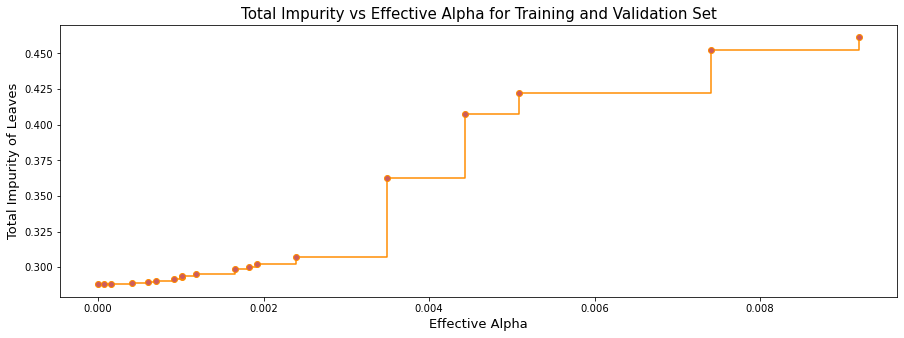

In [47]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

# Find a set of alpha values using base model.
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train_val, y_train_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", markerfacecolor='indianred', color='darkorange')
ax.set_xlabel("Effective Alpha", fontsize=13)
ax.set_ylabel("Total Impurity of Leaves", fontsize=13)
ax.set_title("Total Impurity vs Effective Alpha for Training and Validation Set", fontsize=15)

ccp_alphas = ccp_alphas[:-1]

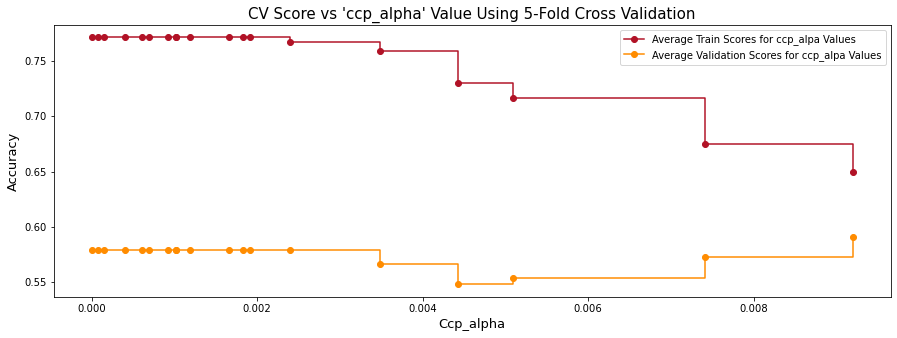

CPU times: user 1.5 s, sys: 59.9 ms, total: 1.56 s
Wall time: 1.73 s


In [48]:
%%time
from sklearn.model_selection import cross_validate
import numpy as np

# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []
best_val = 0
best_alpha = 0

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# For each ccp_alpha value, find mean train and val cross-validation scores
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='accuracy')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    if val_score_mean > best_val:
        best_val = val_score_mean
        best_alpha = ccp_alpha
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("Accuracy", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_train_scores, 
        marker='o', label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')
ax.plot(ccp_alphas, cv_val_scores, 
        marker='o', label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

In [49]:
# Output the alpha value that maximises the accuracy validation score
print(f"The alpha value of {best_alpha} maximises the validation accuracy score - {best_val}")

The alpha value of 0.009193118009776402 maximises the validation accuracy score - 0.5905303030303031


In [50]:
best_alpha = 0.009193118009776402

Grid Search can be used to tune other parameters and other models. For the MLP, Random Search is used because of the size of the search space. Using Grid Search would be impractical.

In [51]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to further optimise DT
import traceback
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
try:

  # Defining parameter range 
    param_grid = {'criterion': ['entropy', 'gini'],  
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 3, 5]}  
    
    grid = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 
  
    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}") 

    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters to use:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

CPU times: user 441 ms, sys: 69.3 ms, total: 511 ms
Wall time: 6.95 s


###### Perceptron

In [52]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to optimise perceptron
# Ignore warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
try:

    # Defining parameter range 
    param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],  
                'max_iter': [1, 10, 100, 1000, 10000]}  
    
    grid = GridSearchCV(Perceptron(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters to use:
{'eta0': 0.0001, 'max_iter': 1}

CPU times: user 376 ms, sys: 20.6 ms, total: 396 ms
Wall time: 837 ms


###### Multi-Layer Perceptron

In [53]:
%%time
# Random search adapted from https://www.mygreatlearning.com/blog/gridsearchcv/
try:

    # Defining parameter range 
    param_grid = {'solver': ['sgd', 'adam', 'ibfgs'],  
                'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (5,5), (10,10), (50,50), (10,5), (50,10)],
                'max_iter': [10, 100, 300, 500, 1000, 5000],
                'learning_rate': ['constant', 'invscaling'], 
                'momentum':[0.9, 0.5, 0.1],
                'nesterovs_momentum': [True, False],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'activation': ['relu', 'logistic', 'tanh']}
    
    grid = RandomizedSearchCV(MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5, random_state=0, n_iter=300)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters to use:
{'solver': 'sgd', 'nesterovs_momentum': True, 'momentum': 0.5, 'max_iter': 500, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'activation': 'relu'}

CPU times: user 5.01 s, sys: 154 ms, total: 5.16 s
Wall time: 51.5 s


###### Gaussian Naïve Bayes

In [54]:
%%time
# Use grid search to optimise NB
try:

    # Defining parameter range 
    # https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n")  

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters to use:
{'var_smoothing': 0.03511191734215131}

CPU times: user 980 ms, sys: 37.5 ms, total: 1.02 s
Wall time: 2.26 s


##### Optimised Models for SimpleImputer() Imputed Missing Values

Decision Tree: 0.620000 (0.042727)
Perceptron: 0.540238 (0.083642)
MLP: 0.585714 (0.045438)
Naive Bayes: 0.419048 (0.053463)


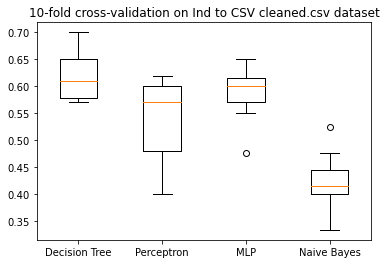

CPU times: user 1.75 s, sys: 53.4 ms, total: 1.81 s
Wall time: 1.11 s


In [55]:
%%time

# DEFINE MODELS
models = []
models.append(('Decision Tree', DecisionTreeClassifier(ccp_alpha=best_alpha, criterion='gini',
                                                       min_samples_leaf=1, min_samples_split=2)))
models.append(('Perceptron', Perceptron(eta0=0.0001, max_iter=1)))
models.append(('MLP', MLPClassifier(solver='sgd', nesterovs_momentum=True, momentum=0.5, max_iter=500,
                                    learning_rate_init=0.001, learning_rate='constant',
                                    hidden_layer_sizes=(50, 50), activation='relu')))
models.append(('Naive Bayes', GaussianNB(var_smoothing=0.03511191734215131)))

# EVALUATE (10-fold cross validation)
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# COMPARISON
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on {} dataset'.format('Ind to CSV cleaned.csv'))
plt.show()

#### (b) Using IterativeImputer()

Another method of imputing provided by Sci-Kit Learn that imputes values is the Iterative imputer, which is a more sophisticated method. This is a multivariate imputer that models missing values for each feature as a function of the other features in a round-robin fashion. This is an iterative process but the maximum number of iterations is set to be *100* for the purposes of this experimentation. 

For more information see https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [56]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=100, random_state=0)

imp_data2 = imp.fit(data.iloc[:,1:-1])
imp_data2 = pd.DataFrame(np.round(imp.transform(data.iloc[:,1:-1])))

imp_data2

0    1    2    3       4    5     6    7     8    9     10   11    12  \
0    1.0  1.0  1.0  1.0   -78.0  1.0   0.0  1.0   2.0  1.0   3.0  2.0   7.0   
1    1.0  1.0  1.0  1.0   -78.0  1.0   0.0  1.0   2.0  1.0   3.0  2.0   7.0   
2    1.0  1.0  1.0  1.0   -78.0  1.0   0.0  1.0   2.0  1.0   3.0  2.0   7.0   
3    1.0  1.0  1.0  1.0   -78.0  1.0   0.0  1.0   2.0  1.0   3.0  2.0   7.0   
4    1.0  1.0  1.0  1.0   -78.0  1.0   0.0  1.0   2.0  1.0   3.0  2.0   7.0   
..   ...  ...  ...  ...     ...  ...   ...  ...   ...  ...   ...  ...   ...   
200  4.0  1.0  2.0  1.0 -9751.0  1.0  11.0  0.0 -11.0  1.0   3.0  2.0  19.0   
201  1.0  1.0  1.0  1.0   -81.0  1.0   2.0  1.0   2.0  1.0   6.0  2.0   7.0   
202  1.0  1.0  1.0  1.0    16.0  1.0   1.0  1.0   2.0  1.0   6.0  2.0   7.0   
203  1.0  1.0  0.0  1.0  -112.0  1.0   2.0  1.0   2.0  1.0  12.0  2.0   9.0   
204  1.0  1.0  0.0  1.0  -112.0  1.0   2.0  1.0   2.0  1.0  12.0  2.0   9.0   

      13   14   15   16     17   18  
0    1.0  1.0  4.0  2.0    2.0  2.0  
1    1.0  1.0  4.0  2.0    2.0  2.0  
2    1.0  1.0  4.0  2.0    2.0  2.0  
3    1.0  1.0  4.0  2.0    2.0  2.0  
4    1.0  1.0  4.0  2.0    2.0  2.0  
..   ...  ...  ...  ...    ...  ...  
200  1.0 -1.0  4.0  3.0  581.0  1.0  
201  3.0  1.0  4.0  2.0    2.0  2.0  
202  3.0  1.0  4.0  2.0   -4.0  2.0  
203  9.0  1.0  4.0  2.0    4.0  4.0  
204  9.0  1.0  4.0  2.0    4.0  4.0  

[205 rows x 19 columns]

In [57]:
new_data2 = pd.concat([data.iloc[:,0].reset_index(drop=True),imp_data2.reset_index(drop=True), data.iloc[:,-1].reset_index(drop=True)], axis=1)
new_data2.columns = ['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48',
                'ethoxy', 'di64', 'di66', 'di67a', 'halide10', 'methoxy',
                'di227','di232', 'ringsize4', 'di260', 'methanol', 'di281',
                'nitro', 'activity']
new_data2

id  amino  di8  di10  di23  cyanate  di48  ethoxy  di64  di66  ...  \
0    d109    1.0  1.0   1.0   1.0    -78.0   1.0     0.0   1.0   2.0  ...   
1    d166    1.0  1.0   1.0   1.0    -78.0   1.0     0.0   1.0   2.0  ...   
2    d199    1.0  1.0   1.0   1.0    -78.0   1.0     0.0   1.0   2.0  ...   
3    d211    1.0  1.0   1.0   1.0    -78.0   1.0     0.0   1.0   2.0  ...   
4    d217    1.0  1.0   1.0   1.0    -78.0   1.0     0.0   1.0   2.0  ...   
..    ...    ...  ...   ...   ...      ...   ...     ...   ...   ...  ...   
200   d78    4.0  1.0   2.0   1.0  -9751.0   1.0    11.0   0.0 -11.0  ...   
201   d38    1.0  1.0   1.0   1.0    -81.0   1.0     2.0   1.0   2.0  ...   
202   d41    1.0  1.0   1.0   1.0     16.0   1.0     1.0   1.0   2.0  ...   
203  d260    1.0  1.0   0.0   1.0   -112.0   1.0     2.0   1.0   2.0  ...   
204  d281    1.0  1.0   0.0   1.0   -112.0   1.0     2.0   1.0   2.0  ...   

     halide10  methoxy  di227  di232  ringsize4  di260  methanol  di281  \
0         3.0      2.0    7.0    1.0        1.0    4.0       2.0    2.0   
1         3.0      2.0    7.0    1.0        1.0    4.0       2.0    2.0   
2         3.0      2.0    7.0    1.0        1.0    4.0       2.0    2.0   
3         3.0      2.0    7.0    1.0        1.0    4.0       2.0    2.0   
4         3.0      2.0    7.0    1.0        1.0    4.0       2.0    2.0   
..        ...      ...    ...    ...        ...    ...       ...    ...   
200       3.0      2.0   19.0    1.0       -1.0    4.0       3.0  581.0   
201       6.0      2.0    7.0    3.0        1.0    4.0       2.0    2.0   
202       6.0      2.0    7.0    3.0        1.0    4.0       2.0   -4.0   
203      12.0      2.0    9.0    9.0        1.0    4.0       2.0    4.0   
204      12.0      2.0    9.0    9.0        1.0    4.0       2.0    4.0   

     nitro   activity  
0      2.0     active  
1      2.0   inactive  
2      2.0     active  
3      2.0   inactive  
4      2.0   inactive  
..     ...        ...  
200    1.0   inactive  
201    2.0     active  
202    2.0     active  
203    4.0   inactive  
204    4.0     active  

[205 rows x 21 columns]

In [58]:
# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(new_data2.columns[1:-1]))
X = new_data2[new_data2.columns[1:-1]]

print('Output Feature: {}\n'.format(new_data2.columns[-1]))
y = new_data2['activity']

Input Features: 
Index(['amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy', 'di64',
       'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232', 'ringsize4',
       'di260', 'methanol', 'di281', 'nitro'],
      dtype='object')
Output Feature: activity



##### Tuning Hyperparameters

In [59]:
# Split the data into train and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 0)

print("Training and Validation Data Shape: {}".format(X_train_val.shape))
print("Testing Data Shape: {}".format(X_test.shape))

Training and Validation Data Shape: (164, 19)
Testing Data Shape: (41, 19)


###### Decision Tree

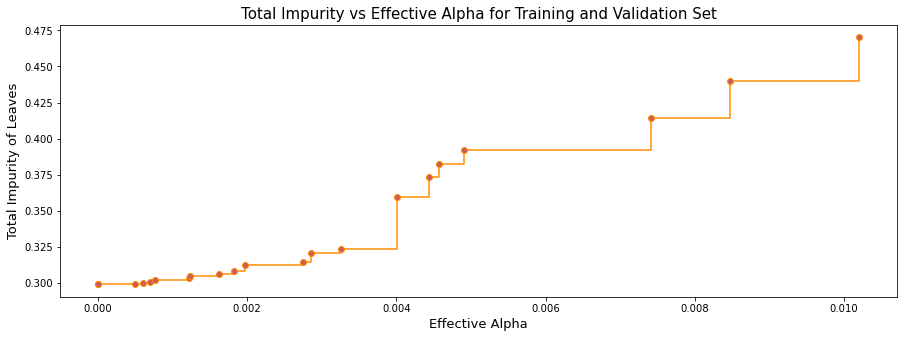

In [60]:
# Find a set of alpha values using base model.
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train_val, y_train_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", markerfacecolor='indianred', color='darkorange')
ax.set_xlabel("Effective Alpha", fontsize=13)
ax.set_ylabel("Total Impurity of Leaves", fontsize=13)
ax.set_title("Total Impurity vs Effective Alpha for Training and Validation Set", fontsize=15)

ccp_alphas = ccp_alphas[:-1]

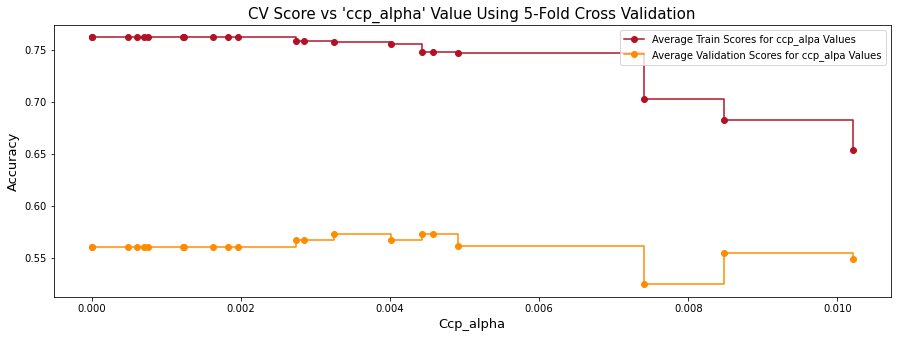

CPU times: user 1.26 s, sys: 38.1 ms, total: 1.3 s
Wall time: 1.31 s


In [61]:
%%time
from sklearn.model_selection import cross_validate
import numpy as np

# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []
best_val = 0
best_alpha = 0

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# For each ccp_alpha value, find mean train and val cross-validation scores
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='accuracy')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    if val_score_mean > best_val:
        best_val = val_score_mean
        best_alpha = ccp_alpha
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("Accuracy", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_train_scores, 
        marker='o', label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')
ax.plot(ccp_alphas, cv_val_scores, 
        marker='o', label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

In [62]:
# Output the alpha value that maximises the accuracy validation score
print(f"The alpha value of {best_alpha} maximises the validation accuracy score - {best_val}")

The alpha value of 0.0032520325203252015 maximises the validation accuracy score - 0.5732954545454545


In [63]:
best_alpha = 0.0032520325203252015

Grid Search can be used to tune other parameters and other models. For the MLP, Random Search is used because of the size of the search space. Using Grid Search would be impractical.

In [64]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to further optimise DT
import traceback
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
try:

  # Defining parameter range 
    param_grid = {'criterion': ['entropy', 'gini'],  
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 3, 5]}  
    
    grid = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 
  
    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}") 

    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters to use:
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}

CPU times: user 281 ms, sys: 15.6 ms, total: 297 ms
Wall time: 619 ms


###### Perceptron

In [65]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to optimise perceptron
# Ignore warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
try:

    # Defining parameter range 
    param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],  
                'max_iter': [1, 10, 100, 1000, 10000]}  
    
    grid = GridSearchCV(Perceptron(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters to use:
{'eta0': 0.0001, 'max_iter': 1}

CPU times: user 361 ms, sys: 14.8 ms, total: 376 ms
Wall time: 702 ms


###### Multi-Layer Perceptron

In [66]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/

# Use random search to optimise MLP

try:

    # Defining parameter range 
    param_grid = {'solver': ['sgd', 'adam', 'ibfgs'],  
                'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (5,5), (10,10), (50,50), (10,5), (50,10)],
                'max_iter': [10, 100, 300, 500, 1000, 5000],
                'learning_rate': ['constant', 'invscaling'], 
                'momentum':[0.9, 0.5, 0.1],
                'nesterovs_momentum': [True, False],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'activation': ['relu', 'logistic', 'tanh']}
    
    grid = RandomizedSearchCV(MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5, random_state=0, n_iter=300)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters to use:
{'solver': 'adam', 'nesterovs_momentum': False, 'momentum': 0.1, 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (5, 5), 'activation': 'tanh'}

CPU times: user 5.21 s, sys: 313 ms, total: 5.52 s
Wall time: 38.9 s


###### Naïve Bayes

In [67]:
%%time
# Use grid search to optimise NB
try:

    # Defining parameter range 
    # https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n")  

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters to use:
{'var_smoothing': 0.8111308307896871}

CPU times: user 973 ms, sys: 36.8 ms, total: 1.01 s
Wall time: 2.26 s


##### Optimised Models for IterativeImputer() Imputed Missing Values

Input Features: 
Index(['amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy', 'di64',
       'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232', 'ringsize4',
       'di260', 'methanol', 'di281', 'nitro'],
      dtype='object')
Output Feature: activity

Decision Tree: 0.560714 (0.082398)
Perceptron: 0.469762 (0.087489)
MLP: 0.590238 (0.058925)
Naive Bayes: 0.599762 (0.031252)


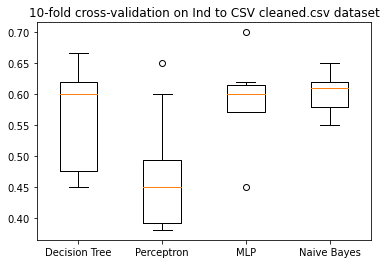

CPU times: user 1.92 s, sys: 34.9 ms, total: 1.96 s
Wall time: 2 s


In [68]:
%%time

# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(new_data2.columns[1:-1]))
X = new_data2[new_data2.columns[1:-1]]

print('Output Feature: {}\n'.format(new_data2.columns[-1]))
y = new_data2['activity']

# DEFINE MODELS
models = []
models.append(('Decision Tree', DecisionTreeClassifier(ccp_alpha=best_alpha, criterion='entropy',
                                                       min_samples_leaf=1, min_samples_split=2)))
models.append(('Perceptron', Perceptron(eta0=0.0001, max_iter=1)))
models.append(('MLP', MLPClassifier(solver='adam', nesterovs_momentum=False, momentum=0.1, max_iter=5000,
                                    learning_rate_init=0.001, learning_rate='invscaling',
                                    hidden_layer_sizes=(5, 5), activation='tanh')))
models.append(('Naive Bayes', GaussianNB(var_smoothing=0.8111308307896871)))

# EVALUATE (10-fold cross validation)
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# COMPARISON
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on {} dataset'.format('Ind to CSV cleaned.csv'))
plt.show()

#### (c) Replacing Missing Values with 0

In [69]:
# Missing values were replaced with 0 as the numerical values represent a count of a given indicator
# If the indicator is not present, count is 0

import pandas as pd

# LOADING CLEANED CSV FILE
data = pd.read_csv('Ind to CSV cleaned.csv', delimiter=',')

# RENAME COLUMNS
print('Initial Feature Names:')
print(data.columns)
data.columns = ['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48',
                'ethoxy', 'di64', 'di66', 'di67a', 'halide10', 'methoxy',
                'di227','di232', 'ringsize4', 'di260', 'methanol', 'di281',
                'nitro', 'activity'] # renaming columns to remove spaces
print('\nFeature Names After Renaming: \n{}'.format(data.columns))

data

Initial Feature Names:
Index(['id', ' amino', ' di8', ' di10', ' di23', ' cyanate', ' di48',
       ' ethoxy', ' di64', ' di66', ' di67a', ' halide10', ' methoxy',
       ' di227', ' di232', ' ringsize4', ' di260', ' methanol', ' di281',
       ' nitro', ' activity'],
      dtype='object')

Feature Names After Renaming: 
Index(['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy',
       'di64', 'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232',
       'ringsize4', 'di260', 'methanol', 'di281', 'nitro', 'activity'],
      dtype='object')


id  amino  di8  di10  di23  cyanate  di48  ethoxy  di64  di66  ...  \
0    d282      0    0     0     0        0     0       0     0     0  ...   
1     d63      1    0     2     0        0     0       0     0     0  ...   
2     d13      0    0     2     0        0     0       0     0     0  ...   
3     d78      0    0     2     0        0     0       0     0     0  ...   
4     d71      0    0     0     0        0     0       0     0     0  ...   
..    ...    ...  ...   ...   ...      ...   ...     ...   ...   ...  ...   
200  d222      0    0     2     0        0     0       0     0     0  ...   
201  d277      0    0     2     0        0     0       0     0     0  ...   
202  d278      0    0     2     0        0     0       0     0     0  ...   
203  d203      3    0     3     0        0     0       0     0     0  ...   
204   d43      4    0     4     0        0     0       0     0     0  ...   

     halide10  methoxy  di227  di232  ringsize4  di260  methanol  di281  \
0           0        0      0      0          0      0         0      1   
1           0        0      0      0          0      0         1      0   
2           0        0      0      0          0      0         2      0   
3           0        0      0      0          0      0         3      0   
4           0        2      0      0          0      0         0      0   
..        ...      ...    ...    ...        ...    ...       ...    ...   
200         0        0      0      0          0      0         0      0   
201         0        0      0      0          0      0         0      0   
202         0        0      0      0          0      0         0      0   
203         0        0      0      0          0      0         0      0   
204         0        0      0      0          0      0         0      0   

     nitro   activity  
0        1   inactive  
1        1   inactive  
2        1     active  
3        1   inactive  
4        1   inactive  
..     ...        ...  
200      0   inactive  
201      0     active  
202      0     active  
203      0     active  
204      0     active  

[205 rows x 21 columns]

In [70]:
# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(data.columns[1:-1]))
X = data[data.columns[1:-1]]

print('Output Feature: {}\n'.format(data.columns[-1]))
y = data['activity']

Input Features: 
Index(['amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy', 'di64',
       'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232', 'ringsize4',
       'di260', 'methanol', 'di281', 'nitro'],
      dtype='object')
Output Feature: activity



##### Tuning Hyperparameters

In [71]:
# Split the data into train and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 0)

print("Training and Validation Data Shape: {}".format(X_train_val.shape))
print("Testing Data Shape: {}".format(X_test.shape))

Training and Validation Data Shape: (164, 19)
Testing Data Shape: (41, 19)


###### Decision Tree

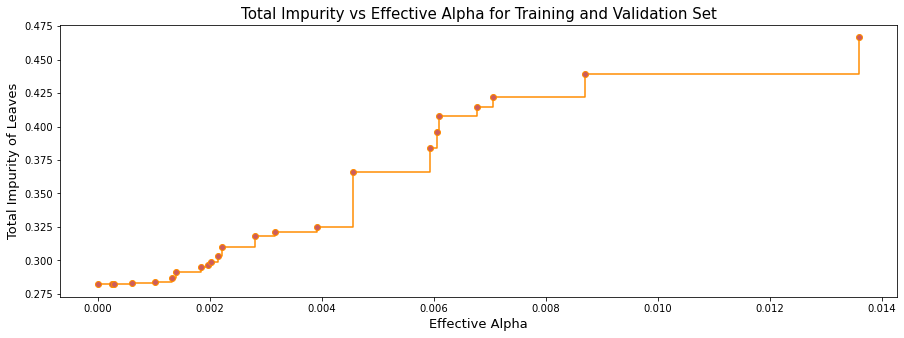

In [72]:
# Find a set of alpha values using base model.
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train_val, y_train_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", markerfacecolor='indianred', color='darkorange')
ax.set_xlabel("Effective Alpha", fontsize=13)
ax.set_ylabel("Total Impurity of Leaves", fontsize=13)
ax.set_title("Total Impurity vs Effective Alpha for Training and Validation Set", fontsize=15)

ccp_alphas = ccp_alphas[:-1]

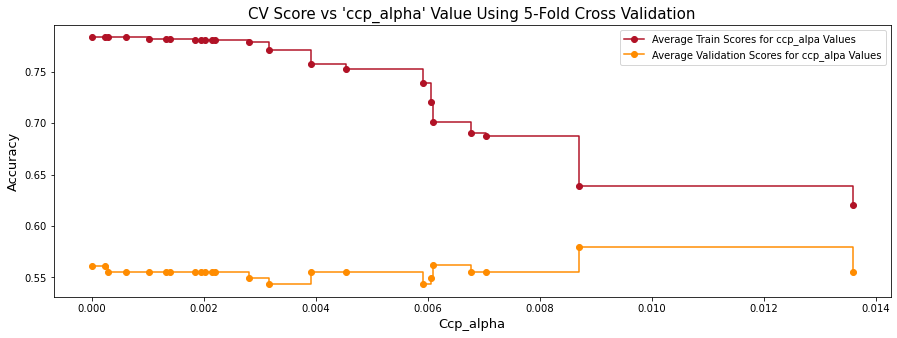

CPU times: user 1.33 s, sys: 38.5 ms, total: 1.37 s
Wall time: 1.38 s


In [73]:
%%time
from sklearn.model_selection import cross_validate
import numpy as np

# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []
best_val = 0
best_alpha = 0

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# For each ccp_alpha value, find mean train and val cross-validation scores
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='accuracy')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    if val_score_mean > best_val:
        best_val = val_score_mean
        best_alpha = ccp_alpha
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("Accuracy", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_train_scores, 
        marker='o', label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')
ax.plot(ccp_alphas, cv_val_scores, 
        marker='o', label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

In [74]:
# Output the alpha value that maximises the accuracy validation score
print(f"The alpha value of {best_alpha} maximises the validation accuracy score - {best_val}")

The alpha value of 0.008700150682506652 maximises the validation accuracy score - 0.5797348484848485


In [75]:
best_alpha = 0.008700150682506652

Grid Search can be used to tune other parameters and other models. For the MLP, Random Search is used because of the size of the search space. Using Grid Search would be impractical.

In [76]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to further optimise DT
import traceback
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
try:

  # Defining parameter range 
    param_grid = {'criterion': ['entropy', 'gini'],  
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 3, 5]}  
    
    grid = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 
  
    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}") 

    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters to use:
{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}

CPU times: user 273 ms, sys: 14.8 ms, total: 288 ms
Wall time: 580 ms


###### Perceptron

In [77]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to optimise perceptron
# Ignore warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
try:

    # Defining parameter range 
    param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],  
                'max_iter': [1, 10, 100, 1000, 10000]}  
    
    grid = GridSearchCV(Perceptron(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters to use:
{'eta0': 0.01, 'max_iter': 100}

CPU times: user 372 ms, sys: 15.4 ms, total: 387 ms
Wall time: 711 ms


###### Multi-Layer Perceptron

In [78]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/

# Use random search to optimise MLP

try:

    # Defining parameter range 
    param_grid = {'solver': ['sgd', 'adam', 'ibfgs'],  
                'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (5,5), (10,10), (50,50), (10,5), (50,10)],
                'max_iter': [10, 100, 300, 500, 1000, 5000],
                'learning_rate': ['constant', 'invscaling'], 
                'momentum':[0.9, 0.5, 0.1],
                'nesterovs_momentum': [True, False],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'activation': ['relu', 'logistic', 'tanh']}
    
    grid = RandomizedSearchCV(MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5, random_state=0, n_iter=300)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters to use:
{'solver': 'sgd', 'nesterovs_momentum': False, 'momentum': 0.9, 'max_iter': 1000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (5,), 'activation': 'relu'}

CPU times: user 6.97 s, sys: 237 ms, total: 7.21 s
Wall time: 1min 27s


###### Naïve Bayes

In [79]:
%%time
# Use grid search to optimise NB
try:

    # Defining parameter range 
    # https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n")  

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters to use:
{'var_smoothing': 0.01}

CPU times: user 910 ms, sys: 38.3 ms, total: 948 ms
Wall time: 3.05 s


##### Optimised Models for Replacing Missing Values With Zeros

Input Features: 
Index(['amino', 'di8', 'di10', 'di23', 'cyanate', 'di48', 'ethoxy', 'di64',
       'di66', 'di67a', 'halide10', 'methoxy', 'di227', 'di232', 'ringsize4',
       'di260', 'methanol', 'di281', 'nitro'],
      dtype='object')
Output Feature: activity

Decision Tree: 0.585476 (0.091853)
Perceptron: 0.514048 (0.096805)
MLP: 0.496667 (0.093102)
Naive Bayes: 0.584524 (0.064385)


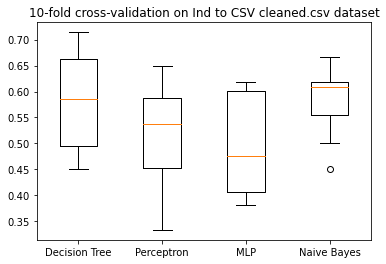

CPU times: user 616 ms, sys: 29.7 ms, total: 645 ms
Wall time: 659 ms


In [80]:
%%time

# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(new_data2.columns[1:-1]))
X = new_data2[new_data2.columns[1:-1]]

print('Output Feature: {}\n'.format(new_data2.columns[-1]))
y = new_data2['activity']

# DEFINE MODELS
models = []
models.append(('Decision Tree', DecisionTreeClassifier(ccp_alpha=best_alpha, criterion='entropy',
                                                       min_samples_leaf=2, min_samples_split=2)))
models.append(('Perceptron', Perceptron(eta0=0.01, max_iter=100)))
models.append(('MLP', MLPClassifier(solver='sgd', nesterovs_momentum=False, momentum=0.9, max_iter=1000,
                                    learning_rate_init=0.01, learning_rate='constant',
                                    hidden_layer_sizes=(5,), activation='relu')))
models.append(('Naive Bayes', GaussianNB(var_smoothing=0.01)))

# EVALUATE (10-fold cross validation)
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# COMPARISON
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on {} dataset'.format('Ind to CSV cleaned.csv'))
plt.show()

#### Additional Research: Dropping Sparsely Populated Features from 0 Imputed Values
One issue with the CSV file generated is that some of the features are very sparesely populated. For example, there are just 2 instances of *'cyanate'* Ashby indicator counts. In an attempt to improve the results, columns with less than 10 non-missing values were removed.

In [81]:
# Finding the number of non-null values in dataset
(data != 0).sum(axis=0)

id           205
amino         59
di8            4
di10         108
di23           8
cyanate        2
di48           8
ethoxy        10
di64           5
di66           4
di67a          4
halide10      49
methoxy       16
di227          8
di232          6
ringsize4      5
di260          1
methanol      12
di281          2
nitro         32
activity     205
dtype: int64

In [82]:
data = data.drop(['cyanate','ringsize4','di8','di23', 'di48',
                   'di64', 'di66', 'di67a', 'di260', 'di281',
                   'di227', 'di232'],axis=1)
print('Non-Null Value Count: \n{}'.format((data != 0).sum(axis=0)))
data

Non-Null Value Count: 
id          205
amino        59
di10        108
ethoxy       10
halide10     49
methoxy      16
methanol     12
nitro        32
activity    205
dtype: int64


id  amino  di10  ethoxy  halide10  methoxy  methanol  nitro   activity
0    d282      0     0       0         0        0         0      1   inactive
1     d63      1     2       0         0        0         1      1   inactive
2     d13      0     2       0         0        0         2      1     active
3     d78      0     2       0         0        0         3      1   inactive
4     d71      0     0       0         0        2         0      1   inactive
..    ...    ...   ...     ...       ...      ...       ...    ...        ...
200  d222      0     2       0         0        0         0      0   inactive
201  d277      0     2       0         0        0         0      0     active
202  d278      0     2       0         0        0         0      0     active
203  d203      3     3       0         0        0         0      0     active
204   d43      4     4       0         0        0         0      0     active

[205 rows x 9 columns]

In [83]:
# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(data.columns[1:-1]))
X = data[data.columns[1:-1]]

print('Output Feature: {}\n'.format(data.columns[-1]))
y = data['activity']

Input Features: 
Index(['amino', 'di10', 'ethoxy', 'halide10', 'methoxy', 'methanol', 'nitro'], dtype='object')
Output Feature: activity



##### Tuning Hyperparameters

In [85]:
# Split the data into train and test (20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state = 0)

print("Training and Validation Data Shape: {}".format(X_train_val.shape))
print("Testing Data Shape: {}".format(X_test.shape))

Training and Validation Data Shape: (164, 7)
Testing Data Shape: (41, 7)


#### Decision Tree

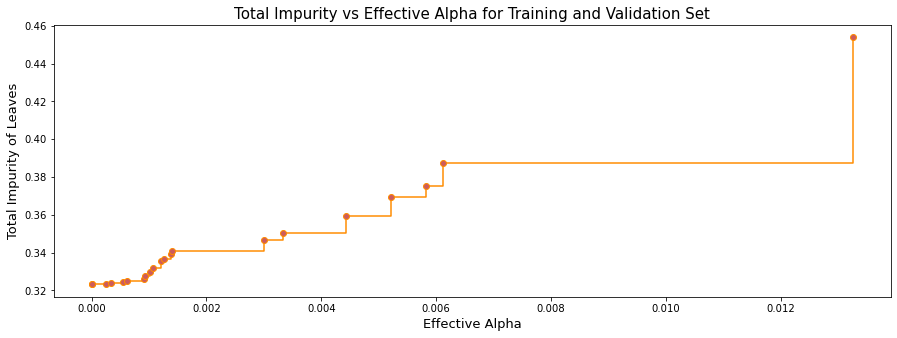

In [86]:
# Find a set of alpha values using base model.
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train_val, y_train_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", markerfacecolor='indianred', color='darkorange')
ax.set_xlabel("Effective Alpha", fontsize=13)
ax.set_ylabel("Total Impurity of Leaves", fontsize=13)
ax.set_title("Total Impurity vs Effective Alpha for Training and Validation Set", fontsize=15)

ccp_alphas = ccp_alphas[:-1]

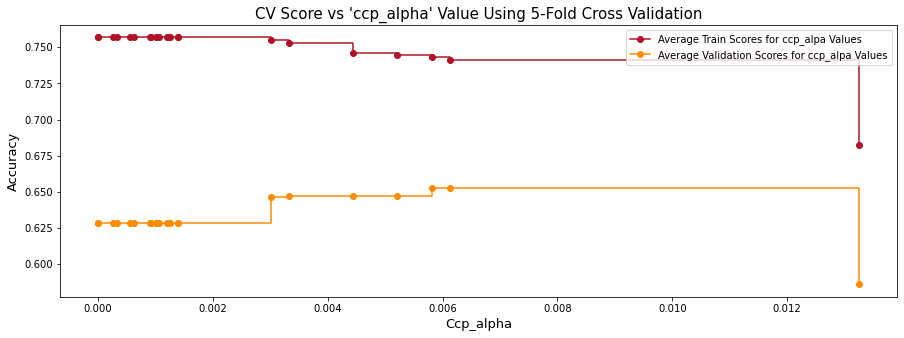

CPU times: user 2.38 s, sys: 60 ms, total: 2.44 s
Wall time: 2.56 s


In [87]:
%%time
from sklearn.model_selection import cross_validate
import numpy as np

# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []
best_val = 0
best_alpha = 0

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# For each ccp_alpha value, find mean train and val cross-validation scores
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='accuracy')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    if val_score_mean > best_val:
        best_val = val_score_mean
        best_alpha = ccp_alpha
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("Accuracy", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_train_scores, 
        marker='o', label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')
ax.plot(ccp_alphas, cv_val_scores, 
        marker='o', label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

In [88]:
# Output the alpha value that maximises the accuracy validation score
print(f"The alpha value of {best_alpha} maximises the validation accuracy score - {best_val}")

The alpha value of 0.0058233320428442426 maximises the validation accuracy score - 0.6529411764705882


In [89]:
best_alpha = 0.0058233320428442426

Grid Search can be used to tune other parameters and other models. For the MLP, Random Search is used because of the size of the search space. Using Grid Search would be impractical.

In [90]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to further optimise DT
import traceback
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
try:

  # Defining parameter range 
    param_grid = {'criterion': ['entropy', 'gini'],  
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 3, 5]}  
    
    grid = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 
  
    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}") 

    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters to use:
{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}

CPU times: user 265 ms, sys: 11.7 ms, total: 277 ms
Wall time: 603 ms


#### Perceptron

In [91]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to optimise perceptron
# Ignore warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
try:

    # Defining parameter range 
    param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],  
                'max_iter': [1, 10, 100, 1000, 10000]}  
    
    grid = GridSearchCV(Perceptron(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters to use:
{'eta0': 1.0, 'max_iter': 1}

CPU times: user 344 ms, sys: 12.9 ms, total: 357 ms
Wall time: 723 ms


#### MLP

In [92]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/

# Use random search to optimise MLP

try:

    # Defining parameter range 
    param_grid = {'solver': ['sgd', 'adam', 'ibfgs'],  
                'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (5,5), (10,10), (50,50), (10,5), (50,10)],
                'max_iter': [10, 100, 300, 500, 1000, 5000],
                'learning_rate': ['constant', 'invscaling'], 
                'momentum':[0.9, 0.5, 0.1],
                'nesterovs_momentum': [True, False],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'activation': ['relu', 'logistic', 'tanh']}
    
    grid = RandomizedSearchCV(MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5, random_state=0, n_iter=300)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters to use:
{'solver': 'adam', 'nesterovs_momentum': True, 'momentum': 0.9, 'max_iter': 5000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (5, 5), 'activation': 'relu'}

CPU times: user 7.14 s, sys: 239 ms, total: 7.37 s
Wall time: 1min 21s


#### Gaussian Naïve Bayes

In [93]:
%%time
# Use grid search to optimise NB
try:

    # Defining parameter range 
    # https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n")  

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters to use:
{'var_smoothing': 0.005336699231206307}

CPU times: user 921 ms, sys: 37.3 ms, total: 958 ms
Wall time: 2.38 s


#### Optimised Models

Input Features: 
Index(['amino', 'di10', 'ethoxy', 'halide10', 'methoxy', 'methanol', 'nitro'], dtype='object')
Output Feature: activity

Decision Tree: nan (nan)
Perceptron: nan (nan)
MLP: nan (nan)
Naive Bayes: nan (nan)


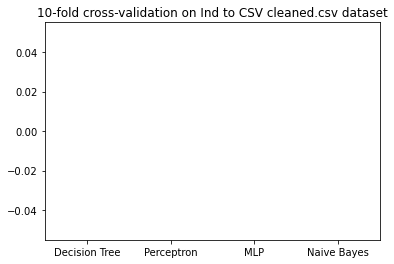

CPU times: user 429 ms, sys: 40.4 ms, total: 470 ms
Wall time: 545 ms


In [110]:
%%time

# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(data.columns[1:-1]))
X = data[data.columns[1:-1]]

print('Output Feature: {}\n'.format(data.columns[-1]))
y = data['activity']

# DEFINE MODELS
models = []
models.append(('Decision Tree', DecisionTreeClassifier(ccp_alpha=best_alpha, criterion='entropy', min_samples_leaf=2, min_samples_split=2)))
models.append(('Perceptron', Perceptron(eta0=1.0, max_iter=1)))
models.append(('MLP', MLPClassifier(solver='adam', nesterovs_momentum=True, momentum=0.9,
                                    max_iter=5000, learning_rate_init=0.01,
                                    learning_rate='constant', hidden_layer_sizes=(5, 5), activation='relu')))
models.append(('Naive Bayes', GaussianNB(var_smoothing=0.005336699231206307)))

# EVALUATE (10-fold cross validation)
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# COMPARISON
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on {} dataset'.format('Ind to CSV cleaned.csv'))
plt.show()

#### Additional Research: Dropping Sparse Columns and with Iterative Imputer

As dropping some of the sparse columns had a positive impact on the results, this was tested again using the iterative imputer (as this outperformed the simple imputer). The columns with less than 10 non-missing values were dropped.

In [111]:
import pandas as pd

# LOADING CLEANED CSV FILE
data = pd.read_csv('Ind to CSV cleaned missing.csv', delimiter=',')

# RENAMING COLUMNS
data.columns = ['id', 'amino', 'di8', 'di10', 'di23', 'cyanate', 'di48',
                'ethoxy', 'di64', 'di66', 'di67a', 'halide10', 'methoxy',
                'di227','di232', 'ringsize4', 'di260', 'methanol', 'di281',
                'nitro', 'activity']

data = data.drop(['cyanate','ringsize4','di8','di23', 'di48',
                   'di64', 'di66', 'di67a', 'di260', 'di281',
                   'di227', 'di232'],axis=1)

In [112]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=100, random_state=0)

imp_data2 = imp.fit(data.iloc[:,1:-1])
imp_data2 = pd.DataFrame(np.round(imp.transform(data.iloc[:,1:-1])))

imp_data2

0    1    2    3     4    5    6
0    1.0  1.0  1.0  3.0   2.0  2.0  1.0
1    1.0  1.0  1.0  3.0   2.0  2.0  1.0
2    1.0  1.0  1.0  3.0   2.0  2.0  1.0
3    1.0  1.0  1.0  3.0   2.0  2.0  1.0
4    1.0  1.0  1.0  3.0   2.0  2.0  1.0
..   ...  ...  ...  ...   ...  ...  ...
200  3.0  2.0  5.0  3.0  24.0  3.0  1.0
201  1.0  1.0  2.0  4.0   2.0  2.0  2.0
202  1.0  1.0  2.0  4.0   2.0  2.0  2.0
203  1.0  0.0  2.0  6.0   2.0  2.0  4.0
204  1.0  0.0  2.0  6.0   2.0  2.0  4.0

[205 rows x 7 columns]

In [113]:
new_data2 = pd.concat([data.iloc[:,0].reset_index(drop=True),imp_data2.reset_index(drop=True), data.iloc[:,-1].reset_index(drop=True)], axis=1)
new_data2.columns = ['id','amino', 'di10', 'ethoxy', 'halide10', 'methoxy', 'methanol', 'nitro', 'activity']
new_data2

id  amino  di10  ethoxy  halide10  methoxy  methanol  nitro   activity
0    d109    1.0   1.0     1.0       3.0      2.0       2.0    1.0     active
1    d166    1.0   1.0     1.0       3.0      2.0       2.0    1.0   inactive
2    d199    1.0   1.0     1.0       3.0      2.0       2.0    1.0     active
3    d211    1.0   1.0     1.0       3.0      2.0       2.0    1.0   inactive
4    d217    1.0   1.0     1.0       3.0      2.0       2.0    1.0   inactive
..    ...    ...   ...     ...       ...      ...       ...    ...        ...
200   d78    3.0   2.0     5.0       3.0     24.0       3.0    1.0   inactive
201   d38    1.0   1.0     2.0       4.0      2.0       2.0    2.0     active
202   d41    1.0   1.0     2.0       4.0      2.0       2.0    2.0     active
203  d260    1.0   0.0     2.0       6.0      2.0       2.0    4.0   inactive
204  d281    1.0   0.0     2.0       6.0      2.0       2.0    4.0     active

[205 rows x 9 columns]

In [114]:
# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(new_data2.columns[1:-1]))
X = new_data2[new_data2.columns[1:-1]]

print('Output Feature: {}\n'.format(new_data2.columns[-1]))
y = new_data2['activity']

Input Features: 
Index(['amino', 'di10', 'ethoxy', 'halide10', 'methoxy', 'methanol', 'nitro'], dtype='object')
Output Feature: activity



##### Tuning Hyperparameters

In [115]:
from sklearn.model_selection import train_test_split
# Split the data into train and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 0)

print("Training and Validation Data Shape: {}".format(X_train_val.shape))
print("Testing Data Shape: {}".format(X_test.shape))

Training and Validation Data Shape: (164, 7)
Testing Data Shape: (41, 7)


###### Decision Tree

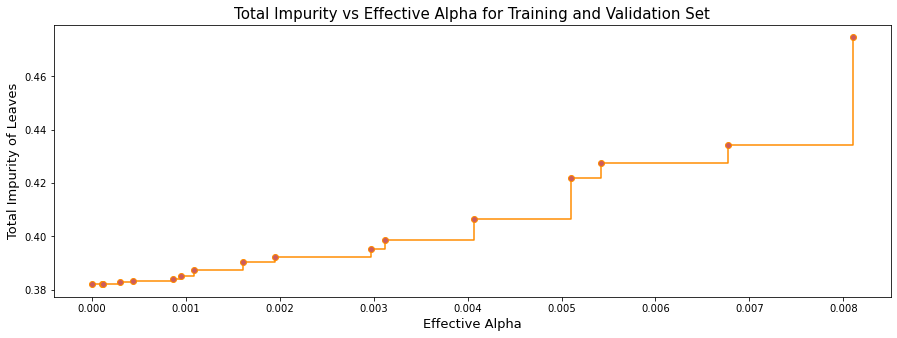

In [116]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

# Find a set of alpha values using base model.
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train_val, y_train_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", markerfacecolor='indianred', color='darkorange')
ax.set_xlabel("Effective Alpha", fontsize=13)
ax.set_ylabel("Total Impurity of Leaves", fontsize=13)
ax.set_title("Total Impurity vs Effective Alpha for Training and Validation Set", fontsize=15)

ccp_alphas = ccp_alphas[:-1]

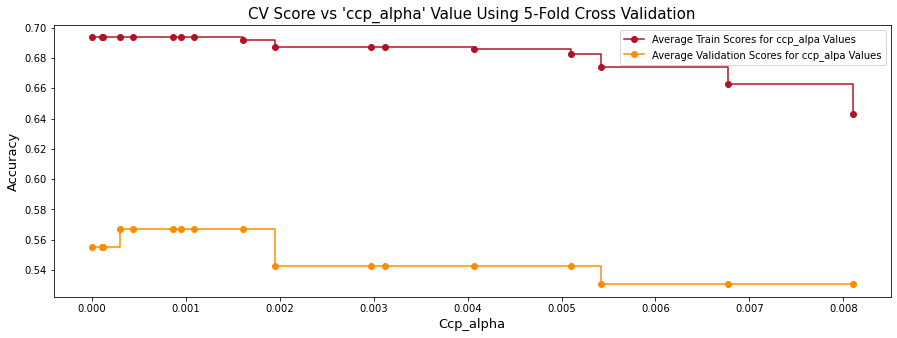

CPU times: user 1.22 s, sys: 49.8 ms, total: 1.27 s
Wall time: 1.3 s


In [117]:
%%time
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []
best_val = 0
best_alpha = 0

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# For each ccp_alpha value, find mean train and val cross-validation scores
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='accuracy')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    if val_score_mean > best_val:
        best_val = val_score_mean
        best_alpha = ccp_alpha
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("Accuracy", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_train_scores, 
        marker='o', label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')
ax.plot(ccp_alphas, cv_val_scores, 
        marker='o', label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

In [118]:
# Output the alpha value that maximises the accuracy validation score
print(f"The alpha value of {best_alpha} maximises the validation accuracy score - {best_val}")

The alpha value of 0.0003048780487804881 maximises the validation accuracy score - 0.5670454545454545


In [119]:
best_alpha = 0.0003048780487804881

Grid Search can be used to tune other parameters and other models. For the MLP, Random Search is used because of the size of the search space. Using Grid Search would be impractical.

In [120]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to further optimise DT
import traceback
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
try:

  # Defining parameter range 
    param_grid = {'criterion': ['entropy', 'gini'],  
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 3, 5]}  
    
    grid = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 
  
    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}") 

    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters to use:
{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2}

CPU times: user 259 ms, sys: 13.5 ms, total: 273 ms
Wall time: 622 ms


###### Perceptron

In [121]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to optimise perceptron
from sklearn.linear_model import Perceptron
# Ignore warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
try:

    # Defining parameter range 
    param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],  
                'max_iter': [1, 10, 100, 1000, 10000]}  
    
    grid = GridSearchCV(Perceptron(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters to use:
{'eta0': 0.001, 'max_iter': 1}

CPU times: user 358 ms, sys: 14.8 ms, total: 373 ms
Wall time: 895 ms


###### Multi-Layer Perceptron

In [122]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/

# Use random search to optimise MLP
from sklearn.neural_network import MLPClassifier
try:

    # Defining parameter range 
    param_grid = {'solver': ['sgd', 'adam', 'ibfgs'],  
                'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (5,5), (10,10), (50,50), (10,5), (50,10)],
                'max_iter': [10, 100, 300, 500, 1000, 5000],
                'learning_rate': ['constant', 'invscaling'], 
                'momentum':[0.9, 0.5, 0.1],
                'nesterovs_momentum': [True, False],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'activation': ['relu', 'logistic', 'tanh']}
    
    grid = RandomizedSearchCV(MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5, random_state=0, n_iter=300)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters to use:
{'solver': 'adam', 'nesterovs_momentum': True, 'momentum': 0.9, 'max_iter': 500, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'activation': 'tanh'}

CPU times: user 7.88 s, sys: 303 ms, total: 8.18 s
Wall time: 1min 57s


###### Naïve Bayes

In [123]:
%%time
# Use grid search to optimise NB
from sklearn.naive_bayes import GaussianNB
try:

    # Defining parameter range 
    # https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='accuracy', cv=5)
    
    # fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean accuracy score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n")  

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters to use:
{'var_smoothing': 1.0}

CPU times: user 977 ms, sys: 44.6 ms, total: 1.02 s
Wall time: 3.45 s


##### Optimised Models for IterativeImputer() Imputed Missing Values with Sparse Columns Dropped

In [124]:
%%time
from sklearn.model_selection import cross_val_score

# SPLIT INPUT/OUTPUT
print('Input Features: \n{}'.format(new_data2.columns[1:-1]))
X = new_data2[new_data2.columns[1:-1]]

print('Output Feature: {}\n'.format(new_data2.columns[-1]))
y = new_data2['activity']

# DEFINE MODELS
models = []
models.append(('Decision Tree', DecisionTreeClassifier(ccp_alpha=best_alpha, criterion='entropy',
                                                       min_samples_leaf=5, min_samples_split=2)))
models.append(('Perceptron', Perceptron(eta0=0.001, max_iter=1)))
models.append(('MLP', MLPClassifier(solver='adam', nesterovs_momentum=True, momentum=0.9, max_iter=500,
                                    learning_rate_init=0.001, learning_rate='constant',
                                    hidden_layer_sizes=(50,), activation='tanh')))
models.append(('Naive Bayes', GaussianNB(var_smoothing=1.0)))

# EVALUATE (10-fold cross validation)
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# COMPARISON
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on {} dataset'.format('Ind to CSV cleaned.csv'))
plt.show()

Input Features: 
Index(['amino', 'di10', 'ethoxy', 'halide10', 'methoxy', 'methanol', 'nitro'], dtype='object')
Output Feature: activity

Decision Tree: 0.610238 (0.077445)
Perceptron: 0.521190 (0.097842)
MLP: 0.604762 (0.063021)
Naive Bayes: 0.604762 (0.014286)


CPU times: user 6.13 s, sys: 179 ms, total: 6.31 s
Wall time: 4.24 s


#### Overall Imputation Results
The results from the research into the various imputation methods can now be easily compared using a table:

In [109]:
print('{:>5} {:>13} {:>16} {:>9}'.format('Imputation','Algorithm','Accuracy(%)','Std Dev'))
print()
print('{:>6} {:>21} {:>9} {:>12}'.format('Simple','Decision Tree',62,0.042727))
print('{:>6} {:>18} {:>12} {:>12}'.format('Simple','Perceptron',54.0238,0.083642))
print('{:>6} {:>11} {:>19} {:>12}'.format('Simple','MLP',59.0238,0.021729))
print('{:>6} {:>19} {:>11} {:>12}'.format('Simple','Naive Bayes',41.9048,0.053463))
print()
print('{:>7} {:>18} {:>9} {:>12}'.format('Iterative','Decision Tree',55.5714,0.081373))
print('{:>7} {:>15} {:>12} {:>12}'.format('Iterative','Perceptron',46.9762,0.087489))
print('{:>7} {:>8} {:>19} {:>12}'.format('Iterative','MLP',59.5238,0.017169))
print('{:>7} {:>16} {:>11} {:>12}'.format('Iterative','Naive Bayes',59.9762,0.031252))
print()
print('{:>4} {:>23} {:>9} {:>12}'.format('Null','Decision Tree',59.0238,0.097028))
print('{:>4} {:>20} {:>12} {:>12}'.format('Null','Perceptron',51.4048,0.096805))
print('{:>4} {:>13} {:>19} {:>12}'.format('Null','MLP',49.6667,0.091083))
print('{:>4} {:>21} {:>11} {:>12}'.format('Null','Naive Bayes',58.4524,0.064385))
print()
print('{:>4} {:>19} {:>9} {:>12}'.format('Null (2)','Decision Tree',65.5238,0.090406))
print('{:>4} {:>16} {:>12} {:>12}'.format('Null (2)','Perceptron',54.5952,0.127331))
print('{:>4} {:>9} {:>19} {:>12}'.format('Null (2)','MLP',62.0238,0.066873))
print('{:>4} {:>17} {:>11} {:>12}'.format('Null (2)','Naive Bayes',60.9762,0.080682))
print()
print('{:>3} {:>14} {:>9} {:>12}'.format('Iterative (2)','Decision Tree',61.0238,0.077445))
print('{:>7} {:>11} {:>11} {:>13}'.format('Iterative (2)','Perceptron',52.1190,0.097842))
print('{:>7} {:>4} {:>20} {:>11}'.format('Iterative (2)','MLP',59.99048,0.061732))
print('{:>7} {:>12} {:>11} {:>12}'.format('Iterative (2)','Naive Bayes',60.4762,0.014286))

Imputation     Algorithm      Accuracy(%)   Std Dev

Simple         Decision Tree        62     0.042727
Simple         Perceptron      54.0238     0.083642
Simple         MLP             59.0238     0.021729
Simple         Naive Bayes     41.9048     0.053463

Iterative      Decision Tree   55.5714     0.081373
Iterative      Perceptron      46.9762     0.087489
Iterative      MLP             59.5238     0.017169
Iterative      Naive Bayes     59.9762     0.031252

Null           Decision Tree   59.0238     0.097028
Null           Perceptron      51.4048     0.096805
Null           MLP             49.6667     0.091083
Null           Naive Bayes     58.4524     0.064385

Null (2)       Decision Tree   65.5238     0.090406
Null (2)       Perceptron      54.5952     0.127331
Null (2)       MLP             62.0238     0.066873
Null (2)       Naive Bayes     60.9762     0.080682

Iterative (2)  Decision Tree   61.0238     0.077445
Iterative (2)  Perceptron      52.119      0.097842
Iterati

Thus, we can see that the best results for all algorithms is yielded from when the missing values are replaced by 0's with hyperparameter tuning, and the sparse columns dropped. Despite all of the optimisation of these sklearn algorithms, it is clear that they are unable to peform nearly as well as the Aleph ILP learning algorithm.

#### Explainability of Results
The Aleph ILP learning system clearly outputted a set of hypotheses for the classifier, providing a clear set of rules that can be easily read by humans. Most of the more traditional classification models are far more black-box, and we may not fully understand the reasons for classification. Using the decision tree to generate a rule set can be demonstrated, as shown below, however does not provide as rich of a ruleset as that provided by the Aleph ILP system.

In [109]:
from sklearn.tree import export_text, plot_tree

# Example rule output from a decision tree using Holdout splitting method for simplicity
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)

dt = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha, criterion='entropy', min_samples_leaf=2, min_samples_split=2)
dt = dt.fit(X_train, Y_train)
features = ['amino', 'di10', 'ethoxy', 'halide10', 'methoxy', 'methanol', 'nitro']
dt_rules = export_text(dt, feature_names=features)
print(dt_rules)

|--- ethoxy <= 1.50
|   |--- methanol <= 0.50
|   |   |--- amino <= 2.50
|   |   |   |--- di10 <= 0.50
|   |   |   |   |--- nitro <= 0.50
|   |   |   |   |   |--- halide10 <= 0.50
|   |   |   |   |   |   |--- class:  active
|   |   |   |   |   |--- halide10 >  0.50
|   |   |   |   |   |   |--- class:  active
|   |   |   |   |--- nitro >  0.50
|   |   |   |   |   |--- class:  active
|   |   |   |--- di10 >  0.50
|   |   |   |   |--- nitro <= 0.50
|   |   |   |   |   |--- amino <= 0.50
|   |   |   |   |   |   |--- halide10 <= 1.00
|   |   |   |   |   |   |   |--- methoxy <= 1.00
|   |   |   |   |   |   |   |   |--- class:  inactive
|   |   |   |   |   |   |   |--- methoxy >  1.00
|   |   |   |   |   |   |   |   |--- class:  inactive
|   |   |   |   |   |   |--- halide10 >  1.00
|   |   |   |   |   |   |   |--- class:  active
|   |   |   |   |   |--- amino >  0.50
|   |   |   |   |   |   |--- class:  active
|   |   |   |   |--- nitro >  0.50
|   |   |   |   |   |--- class:  active
|   |  

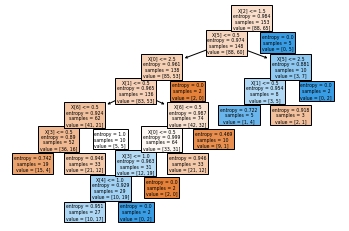

In [21]:
# Showing the rule set graphically
plot_tree(dt, filled=True)
plt.show()

### Conclusion of Results
Despite seeing a reasonably successful classifier based on the Ashby indicators, this is nowhere near the accuracies achieved by the Aleph ILP learning algorithm. In addition, the more traditional classification methods are far less explainable as do not output hypothesis rule sets (other than the decision tree, as shown).